In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## How to use this notebook

**Input**: Read summary statistics table(s) `read_stats.csv` generated by the rule `concat_statistics`. 

**Output**: Grouped bar graph(s) of the number of reads and bases remaining after each quality control step in each sample. 

- Rows:    2. Row 1 graphs the numbers of reads. Row 2 graphs the number of bases.
- Columns: Number of sample sets. Each graph summarizes the samples from a single CSV.  

### Steps

**Usage**: There are 4 cells that require user customization, described below. I designed this notebook specifically for the Microbiome-in-a-Bottle dataset but tried to generalize as much as possible. Each of these cells is indicated with the text `Customize here`. 

1) Add paths to the read summary statistics tables for all of the sample sets you want to visualize to `stats_lst`.

- Here, I was trying to graph read statistics from multiple sample sets. For example, all of the samples from set 98 were documented in `/path/to/98/read_stats.csv`. 
- You can graph a single set of samples or multiple sets with no additional graphics customizations- the figures will resize accordingly!

2) Customize how the samples are named and grouped using `samples_ordered` and `samples_named`. 

- Here, each sample set is a chart (ex. Sample 98) and each sample within the set is labeled using `samples_named` (ex. Zymo Kit, Phase).
- I needed to divide the name of each sample into two components- the actual IDs and the DNA extraction method. For example, the samples with names `98_zykt` and `98_phse` in `/path/to/98/read_stats.csv` were divided into `98` and `zykt`, and `98` and `phse` respectively.

3) Customize how the samples are named and grouped in the figure using `new_cols`.

4) Customize the number of bar colours according to the number of steps used in the quality control process using `steps_colours`. 

## Load sample summary tables

In [26]:
# Set seaborn plotting aesthetics as default
sns.set()

In [55]:
# Customize here
# Add read summary statistics tables for each sample set in a list
stats_lst = ['/path/to/98/read_stats.csv', '/path/to/99/read_stats.csv']

In [3]:
# Customize here
# This is the second component of each sample's name, and how each sample i.e.: grouped set of
# bars is labeled. See below figure for an example. Each sample set is a chart (ex. Sample 98)
# and each sample within the set is labeled using `samples_named` (ex. Zymo Kit, Phase).
# Note: Sample name splitting is totally optional! 
# If you don't need to do this, please do the following:
# 1) Replace `samples_ordered` below with `merged_df['sample_name']` as indicated in the
# comment. 
# 2) Replace `samples_named` below with `merged_df['sample_name']` as indicated in the
# comment OR tidied-up versions of your own sample names.
samples_ordered = ['zykt', 'zytp', 'phse'] # merged_df['sample_name']
samples_named = ['Zymo Kit', 'Zymo\nThree-Peaks', 'Phase'] # merged_df['sample_name']

In [56]:
# Merge the sample set dataframes and check their contents
df_lst = []
for df in stats_lst:
    df_lst.append(pd.read_csv(df, header = 0))
merged_df = pd.concat(df_lst)

merged_df.iloc[[1,20,40,60],:]

,sample_name,step,num_reads,prop_init_reads,total_size,prop_init_bases,mean_read_len
1,98_zykt,0_lowqual_removal,69483606,0.951228,10098940206,0.918181,145.34
2,99_zykt,1_adapter_removal,70618640,0.944668,10234796232,0.909111,144.93
4,101_zykt,3_error_removal,91301980,0.944758,13213425350,0.908028,144.72
6,102_zytp,0_lowqual_removal,89360306,0.944611,12966310364,0.910142,145.10


## Relabel sample names (optional)

In [ ]:
# Customize here
# Separate sample names into two components. Here, I'm splitting `sample_name` into the 
# actual sample number and the extraction/library source. ex. '98_zykt' into '98' and 'zykt'.
# Note: Sample name splitting is totally optional! 
# If you don't need to do this, please do the following:
# 1) Comment out `new_cols` below.
# 2) Replace `sample_num_lst` below with 'Samples' as indicated in the comments. 
# 3) Replace `merged_df['sample_prep']` below with `merged_df['sample_name']` as indicated in
# the comments. 
new_cols = [s.split('_') for s in merged_df['sample_name']]
sample_num_lst = [s[0] for s in new_cols] # 'Samples'
merged_df['sample_num'] = sample_num_lst
merged_df['sample_prep'] = [s[1] for s in new_cols] # merged_df['sample_name']

merged_df.iloc[[1,20,40,60],:]

# Read Summary Stats Dataviz

In [4]:
# Customize here
# The number of step colours is equal to the number of steps used in the quality control
# process. Here, I have 6 colours because I added an extra trimming step after error removal.
# Since there are only 5 steps in the short-read QC module, comment one colour out. 
steps_colours = ['#ffa600', '#ff6e54', '#dd5182', '#955196', '#444e86', '#003f5c']

## Numbers of reads and bases at all stages for each sample

In [60]:
%%capture
# To suppress figure output
# Define plotting region
# Rows:    2. Row 1 graphs the numbers of reads. Row 2 graphs the number of bases.
# Columns: Number of sample sets. Each graph summarizes the samples from a single CSV.  
row_labels = ['Reads', 'Bases']
col_labels = list(set(sample_num_lst))
fig, axs = plt.subplots(len(row_labels), len(col_labels), sharey = 'row', figsize = (24,12)) # in.

In [62]:
def grouped_bar_plot(df, r, a):
    parameter = 'num_reads' if r == 'Reads' else 'total_size'
    p = sns.barplot(data = df, x = 'sample_prep', y = parameter, hue = 'step', \
                    order = samples_ordered, palette = steps_colours, ax = a)
    p.set_xticklabels(samples_named, size = 12) #, rotation = 45, ha = 'right') # Relabel each of the groups
    p.set(xlabel = None, ylabel = None) # Turns off axis label for each subplot
    a.get_legend().remove()
    return p

In [63]:
for i, r in enumerate(row_labels):
    for j, c in enumerate(col_labels):
        sample_df = merged_df[merged_df['sample_num'] == c]
        grouped_bar_plot(sample_df, r, axs[i,j])
        if i == 0: 
            axs[i,j].set_title('Sample ' + str(c), size = 16)
    axs[i,0].set_ylabel('Num. ' + r, size = 16)

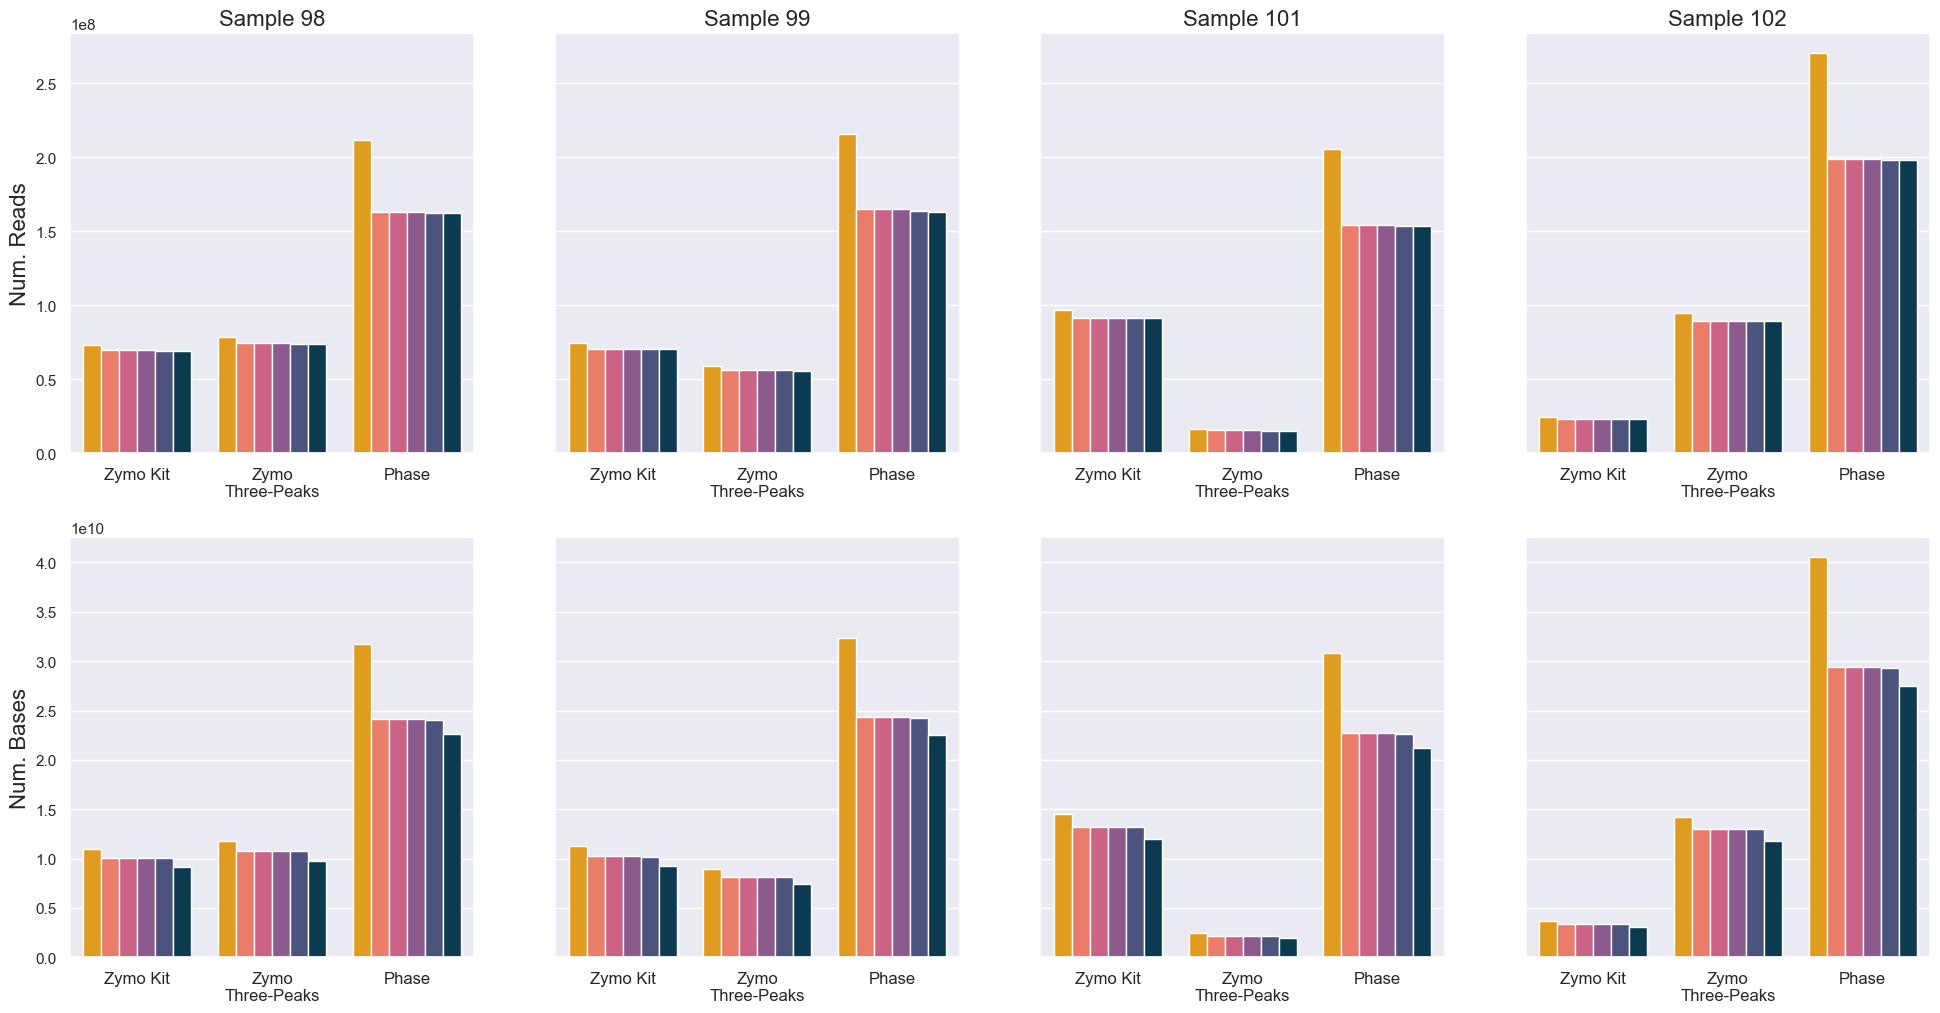

In [64]:
# Add a global legend referring to all and plot the graph
steps_named = ['Low Qual. Removal', 'Adapter Removal', 'Host Read Removal', 
               'Base-by-base Corr.', 'Retrimming']
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, steps_named, loc = 'center right', fontsize = 16)
fig

In [65]:
# Save a large SVG without padding
fig.savefig('num_reads_bases_step.svg', dpi = 1000, bbox_inches = 'tight')